In [59]:
import pandas as pd
import tabula
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import zipfile
import tempfile
import requests
from io import BytesIO

In [60]:
#Leer archivo imss
imss=pd.read_csv(r"Z:\Mi unidad\SEDATU\empleo_imss\asg-2024-05-31.csv",  sep='|', encoding='latin1', low_memory=False)

In [61]:
imss = imss[imss['cve_delegacion'].isin([4,12,21,30,33])]
#Crear variable nom_ent
imss['entidad']=imss['cve_delegacion'].map({4:'CAMPECHE', 12:'GUERRERO', 21:'OAXACA', 30:'TLAXCALA', 33:'YUCATAN'})
imss

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,...,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc,entidad
318129,4,1,4,A10,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0.00,0.00,0.0,0.0,0.0,CAMPECHE
318130,4,1,4,A10,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0.00,0.00,0.0,0.0,0.0,CAMPECHE
318131,4,1,4,A10,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0.00,0.00,0.0,0.0,0.0,CAMPECHE
318132,4,1,4,A10,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0.00,0.00,0.0,0.0,0.0,CAMPECHE
318133,4,1,4,A10,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0.00,0.00,0.0,0.0,0.0,CAMPECHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072249,33,33,31,Y70,9.0,94.0,9403.0,S3,2,E4,...,3,0,0,0,1408.71,1408.71,0.0,0.0,0.0,YUCATAN
4072250,33,33,31,Y70,9.0,94.0,9403.0,S3,2,E5,...,2,0,0,0,939.14,939.14,0.0,0.0,0.0,YUCATAN
4072251,33,33,31,Y70,9.0,94.0,9403.0,S3,2,E6,...,1,0,0,0,413.04,413.04,0.0,0.0,0.0,YUCATAN
4072252,33,33,31,Y70,9.0,94.0,9403.0,S3,2,E6,...,1,0,0,0,440.89,440.89,0.0,0.0,0.0,YUCATAN


In [62]:
tabla_imss= imss.groupby(['entidad'])['ta'].sum().reset_index(name='imss')
tabla_imss

,entidad,imss
0,CAMPECHE,141141
1,GUERRERO,162349
2,OAXACA,229838
3,TLAXCALA,118131
4,YUCATAN,437588


In [63]:
#leer archivo issste
issste=pd.read_csv(r"Z:\Mi unidad\SEDATU\archivos issste\2024\2024_05_3_00\2024_05_3_00.txt", encoding='iso-8859-1', sep='\t', low_memory=False, on_bad_lines='skip')
issste

,id,anio,mes,apellido_paterno,apellido_materno,nombre,tno_cve,nombramiento,sexo,sueldo_issste,mult_sdo_issste,fecha_alta,fecha_ingreso,antig,num_ramo,ramo,entidad,mod_cve,modalidad,sector
0,378603195,2024,5,BECERRA,BECERRA,RAMIRO,60,OTROS,H,6289.42,0,2014-03-01 00:00:00,2012-03-01 00:00:00,12,12,SECRETARIA DE SALUD (S. SALUD),JALISCO,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",DEPENDENCIA FEDERAL
1,378603196,2024,5,DIAZ,REYES,ASUNCION,10,BASE,H,9846.60,1,1994-10-01 00:00:00,1984-10-16 00:00:00,40,11907,SECRETARIA DE EDUCACION DEL EJECUTIVO DEL ESTA...,CHIAPAS,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
2,378603459,2024,5,GONZALEZ,OSORIO,DAVID,30,EVENTUAL,H,31122.00,4,2024-04-09 00:00:00,2019-01-27 00:00:00,5,7,SECRETARIA DE LA DEFENSA NACIONAL (S.D.N.),ENTIDAD DESCONOCIDA,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",DEPENDENCIA FEDERAL
3,378603460,2024,5,OCHOA,GUTIERREZ,JORGE LUIS,60,OTROS,H,11267.00,1,1999-07-01 00:00:00,1999-07-01 00:00:00,25,12910,SERVICIOS DE SALUD DEL ESTADO DE DURANGO,DURANGO,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
4,378603461,2024,5,CASTILLO,GUITIMEA,GRACIELA,10,BASE,M,9412.50,1,2021-09-01 00:00:00,2021-09-01 00:00:00,3,11914,SECRETARIA DE EDUCACION JALISCO,COLIMA,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930653,381533842,2024,5,RANGEL,REYES,NORA ALICIA,10,BASE,M,17100.84,2,1991-02-28 00:00:00,1990-11-01 00:00:00,34,11,SECRETARIA DE EDUCACION PUBLICA (SEP),NUEVO LEON,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",DEPENDENCIA FEDERAL
2930654,381533843,2024,5,SALAZAR,OVALLE,GUADALUPE,60,OTROS,H,16748.00,2,2012-01-01 00:00:00,1990-12-01 00:00:00,28,28000,GOBIERNO DEL ESTADO DE TAMAULIPAS,TAMAULIPAS,20,SOLO SERV. MED. A PENS. DIRECTOS CON CARGO A O...,GOBIERNO ESTATAL
2930655,381533844,2024,5,DE LA PARRA,ZUÑIGA,NEREIDA,10,BASE,M,8994.66,1,1999-05-16 00:00:00,1999-05-16 00:00:00,25,11,SECRETARIA DE EDUCACION PUBLICA (SEP),CIUDAD DE MEXICO,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANO DESCONCENTRADO
2930656,381533845,2024,5,GONZALEZ,CARDIN,VICENTE ERNESTO,10,BASE,H,32571.00,4,1999-07-01 00:00:00,1979-07-01 00:00:00,46,770,UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO,CIUDAD DE MEXICO,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO


In [64]:
issste["entidad"].unique()

array(['JALISCO', 'CHIAPAS', 'ENTIDAD DESCONOCIDA', 'DURANGO', 'COLIMA',
       'QUINTANA ROO', 'OAXACA', 'NAYARIT', 'GUERRERO', 'GUANAJUATO',
       'YUCATAN', 'MICHOACAN', 'CIUDAD DE MEXICO', 'SAN LUIS POTOSI',
       'MEXICO', 'VERACRUZ', 'PUEBLA', 'CHIHUAHUA', 'SINALOA',
       'ZACATECAS', 'SONORA', 'TAMAULIPAS', 'QUERETARO', 'AGUASCALIENTES',
       'BAJA CALIFORNIA SUR', 'NUEVO LEON', 'BAJA CALIFORNIA', 'TABASCO',
       'MORELOS', 'HIDALGO', 'TLAXCALA', 'COAHUILA', 'CAMPECHE',
       'POR CORREGIR'], dtype=object)

In [65]:
#Filtrar entidades de imss
issste= issste[issste['entidad'].isin(['CAMPECHE', 'GUERRERO', 'OAXACA', 'TLAXCALA', 'YUCATAN'])]
issste

,id,anio,mes,apellido_paterno,apellido_materno,nombre,tno_cve,nombramiento,sexo,sueldo_issste,mult_sdo_issste,fecha_alta,fecha_ingreso,antig,num_ramo,ramo,entidad,mod_cve,modalidad,sector
7,378603464,2024,5,CHAVEZ,GARCIA,TOMAS SAHADI,95,ARTICULO 24,H,14038.20,1,2022-02-01 00:00:00,2022-02-01 00:00:00,2,637,INST. DE SEG. Y SERVS. SOCLS. DE LOS TRABJS. D...,OAXACA,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANO DESCONCENTRADO
9,378603466,2024,5,ONOFRE,CIRIACO,EVID,10,BASE,H,13431.70,1,2008-05-01 00:00:00,2008-01-01 00:00:00,16,12920,SERVICIOS DE SALUD DEL ESTADO DE OAXACA,OAXACA,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
10,378603467,2024,5,MADRID,CAMERO,BRISA,10,BASE,M,10743.34,1,2016-05-16 00:00:00,2016-05-16 00:00:00,8,11912,INSTITUTO DE EDUCACION BASICA Y NORMAL DE GUER...,GUERRERO,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
14,378603471,2024,5,QUIJANO,MOLINA,JAVIER ALBERTO,60,OTROS,H,13962.00,1,2013-02-01 00:00:00,2007-10-01 00:00:00,16,12931,SERVICIOS DE SALUD DEL ESTADO DE YUCATAN,YUCATAN,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
16,378603457,2024,5,CASTILLO,GUZMAN,CLAUDIA IVETTE,10,BASE,M,21289.20,2,2024-01-01 00:00:00,2018-09-16 00:00:00,5,470,SERVICIOS DE SALUD DEL IMSS PARA EL BIENESTAR,OAXACA,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930625,381533636,2024,5,SIMON,TLATEMPA,LUIS,10,BASE,H,25293.00,3,1998-07-01 00:00:00,1998-07-01 00:00:00,26,12912,SERVICIOS ESTATALES DE SALUD. GUERRERO,GUERRERO,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
2930626,381533637,2024,5,BENITEZ,COLON,MARIA YESENIA,10,BASE,M,21524.20,2,2024-01-01 00:00:00,2007-05-16 00:00:00,17,470,SERVICIOS DE SALUD DEL IMSS PARA EL BIENESTAR,OAXACA,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
2930634,381533645,2024,5,JIMENEZ,MAY,KRYSTAL DE ABRIL,10,BASE,M,17925.00,2,2012-05-01 00:00:00,2012-05-01 00:00:00,12,12360,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,CAMPECHE,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO
2930638,381533847,2024,5,JIMENEZ,POMPOSO,KAREN YAZMIN,10,BASE,M,16044.00,2,2023-10-16 00:00:00,2023-10-16 00:00:00,1,470,SERVICIOS DE SALUD DEL IMSS PARA EL BIENESTAR,GUERRERO,1,"TODOS LOS SEGUROS, PRESTACIONES Y SERVICIOS",ORGANISMO DESCENTRALIZADO


In [66]:
tabla_issste= issste.groupby(['entidad']).size().reset_index(name='issste')
tabla_issste

,entidad,issste
0,CAMPECHE,23158
1,GUERRERO,114185
2,OAXACA,125806
3,TLAXCALA,35946
4,YUCATAN,41176


In [81]:
#Pegar ambas tablas
tabla_final= pd.merge(tabla_imss, tabla_issste, on='entidad')
#Sumar ta_x y ta_y
tabla_final['total']=tabla_final['imss']+tabla_final['issste']
print(tabla_final["total"].sum())
print((171161 / tabla_final["total"].sum()) * 100)
tabla_final['imss'] = tabla_final['imss'].map('{:,}'.format)
tabla_final['issste'] = tabla_final['issste'].map('{:,}'.format)
tabla_final['total'] = tabla_final['total'].map('{:,}'.format)

tabla_final

1429318
11.97501185880259


,entidad,imss,issste,total
0,CAMPECHE,"141,141","23,158","164,299"
1,GUERRERO,"162,349","114,185","276,534"
2,OAXACA,"229,838","125,806","355,644"
3,TLAXCALA,"118,131","35,946","154,077"
4,YUCATAN,"437,588","41,176","478,764"


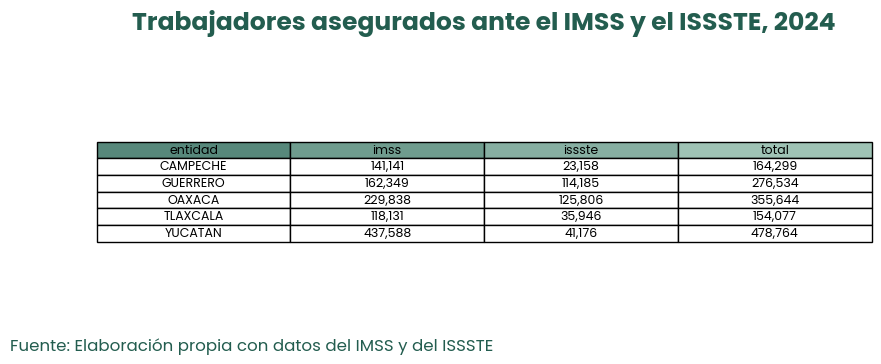

In [82]:
plt.rcParams['font.family'] = 'Poppins'
# Definir color de la tabla
colors = ["#235D4F", "#D3EEE1"] 
cm = LinearSegmentedColormap.from_list('custom', colors, N=256)

fig, ax = plt.subplots(figsize=(10, 4))
num_columns = len(tabla_final.columns)

# Aplicar el color a las columnas
col_colours = [cm(0.3 + i * (0.7 - 0.3) / (num_columns - 1)) for i in range(num_columns)]
#Agregar titulo
plt.title('Trabajadores asegurados ante el IMSS y el ISSSTE, 2024',  fontsize=18, fontweight='bold', color='#235D4F')
#Eliminar ejes
plt.axis('off')
#Añadir fuente
plt.text(0.2, 0, "Fuente: Elaboración propia con datos del IMSS y del ISSSTE"
                , ha='center', va='center', fontsize=12, color='#235D4F')

# Crear tabla
table = ax.table(cellText=tabla_final.values, colLabels=tabla_final.columns, loc='center', colColours=col_colours)

# Ajustar tamaño de fuente
table.auto_set_font_size(False)
table.set_fontsize(9)

# Centrar texto de las celdas
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center')